## Problem Statement 1:
Is gender independent of education level? A random sample of 395 people were surveyed and each person was asked to report the highest education level they obtained. The data that resulted from the survey is summarized in the following table:
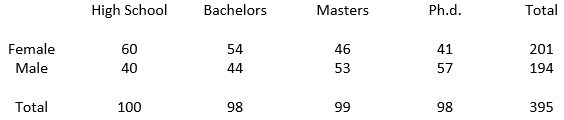
Question: Are gender and education level dependent at 5% level of significance? In other words, given the data collected above, is there a relationship between the gender of an individual and the level of education that they have obtained?

In [1]:
# Chi-square test of independence
# Null Hypothesis H0: The gender of an individual and the level of education that they have obtained are Independent
# Alternative Hypothesis H1: The gender of an individual and the level of education that they have obtained are NOT Independent

import numpy as np
from scipy.stats import chi2_contingency

observed_values = np.array([[60, 54, 46, 41], [40, 44, 53, 57]])

t_stat, p_value, df, expected_values = chi2_contingency(observed_values)
print('T-statistic = %0.4f, P-value = %0.4f'%(t_stat, p_value))

# at 5% level of significance reject the null hypothesis if P-value less than 0.05
if p_value > 0.05:
    print('P-value > 0.05. Fail to reject the Null Hypothesis: The gender of an individual and the level of education that they have obtained are Independent')
else:
    print('P-value < 0.05. Reject the Null Hypothesis: There is a relationship between the gender of an individual and the level of education that they have obtained')

T-statistic = 8.0061, P-value = 0.0459
P-value < 0.05. Reject the Null Hypothesis: There is a relationship between the gender of an individual and the level of education that they have obtained


## Problem Statement 2:
Using the following data, perform a oneway analysis of variance using α=.05. Write up the results in APA format.

[Group1: 51, 45, 33, 45, 67]

[Group2: 23, 43, 23, 43, 45]

[Group3: 56, 76, 74, 87, 56]

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.DataFrame({'Groups':['Group'+str(i) for i in range(1,4) for j in range(1,6)],
                     'Values':[51, 45, 33, 45, 67, 23, 43, 23, 43, 45, 56, 76, 74, 87, 56]})

mod = ols('Values ~ Groups', data=data).fit()
                
anova_table = sm.stats.anova_lm(mod, typ=2)

# Adding column for mean squares
anova_table['mean_sq'] = anova_table['sum_sq']/anova_table['df']

# Adding eta-squared
# eta_sqrd = SSbetween/SStotal
# Eta-Squared has the following interpretation:
# Out of the total variation in Y, eta-squared is the proportion that can be attributed to a specific X.
anova_table['eta_sq'] = anova_table[:-1]['sum_sq']/sum(anova_table['sum_sq'])

#Adding omega-squared
# omega_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)
# Omega-squared (ω2) is a measure of effect size, or the degree of association for a population. 
# It is an estimate of how much variance in the response variables are accounted for by the explanatory variables.
anova_table['omega_sq'] = (anova_table[:-1]['sum_sq'] -
                           anova_table[:-1]['df']*anova_table['mean_sq'][-1])/(sum(anova_table['sum_sq']) +
                                                                               anova_table['mean_sq'][-1])

cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
anova_table = anova_table[cols]
print(anova_table)

# Level of significance is α=0.05
if anova_table['PR(>F)'][0]>0.05:
    print('\nPR(>F) > 0.05. There is no statistically significant difference between the groups.')
else:
    print('\nPR(>F) < 0.05. There is a statistically significant difference between the groups.')

               sum_sq    df      mean_sq         F   PR(>F)   eta_sq  omega_sq
Groups    3022.933333   2.0  1511.466667  9.747206  0.00306  0.61898  0.538382
Residual  1860.800000  12.0   155.066667       NaN      NaN      NaN       NaN

PR(>F) < 0.05. There is a statistically significant difference between the groups.


## Conclusion (APA Format)
For significance level α=.05, there is a statistically significant difference between the groups at p<.05 [F(2,12) = 9.75, p = .003, with an overall effect ω2 = .54].

## Problem Statement 3:
Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25.

For 10, 20, 30, 40, 50:

In [3]:
# Null Hypothesis H0: var1 = var2 (the population variances are equal)
# Alternative Hypothesis H1: var1 ≠ var2 (the population variances are not equal)
# Significance Level, alpha = 0.05

from scipy.stats import f

x = np.array([10, 20, 30, 40, 50])
y = np.array([5, 10, 15, 20, 25])

f_stat = np.var(x, ddof=1)/np.var(y, ddof=1) # calculate F test statistic 

dfn = x.size - 1 # degrees of freedom of numerator 
dfd = y.size - 1 # degrees of freedom of denominator 

# find p-value of F test statistic 
p_value = f.sf(f_stat, dfn, dfd)

print('The F test statistic is %0.3f and the corresponding p-value is %0.3f.'%(f_stat, p_value))

# Reject the Null Hypothesis if P-Value < 0.05
if p_value > 0.05:
    print('P-value > 0.05 . Fail to reject the Null Hypothesis. Population variances are equal.')
else:
    print('P-value < 0.05 . Reject the Null Hypothesis. Population variances are not equal.')

The F test statistic is 4.000 and the corresponding p-value is 0.104.
P-value > 0.05 . Fail to reject the Null Hypothesis. Population variances are equal.
